In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging 
logging.basicConfig(level=logging.INFO)
def get_plot_data(pred_filepath,true_filepath, timestep):
    pred_data = np.load(pred_filepath)
    true_data = np.load(true_filepath)
    logging.info("Data shape: {}".format(pred_data.shape))
    logging.info("Data shape: {}".format(true_data.shape))
    return pred_data[timestep][0], true_data[timestep][0]


INFO:root:Data shape: (95, 1, 200, 200)
INFO:root:Data shape: (95, 1, 200, 200)


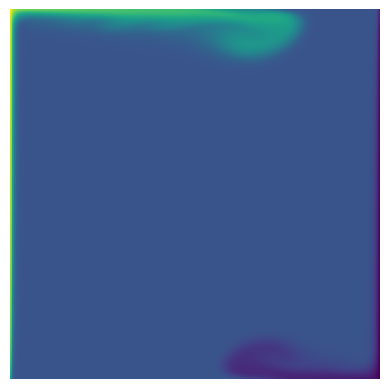

INFO:root:Data shape: (95, 1, 200, 200)
INFO:root:Data shape: (95, 1, 200, 200)


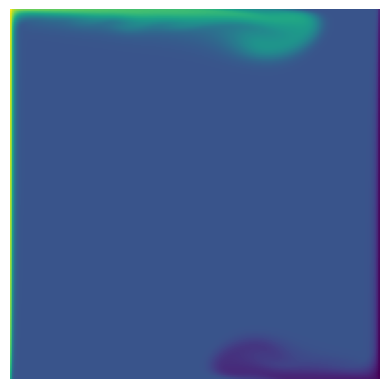

INFO:root:Data shape: (95, 1, 200, 200)
INFO:root:Data shape: (95, 1, 200, 200)


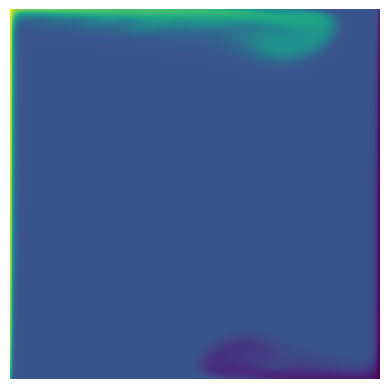

In [3]:
required_timestep_arr = [0, 50, 94]
data_root = "/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/"
data_type = "t_arr"
for timestep in required_timestep_arr:
    pred_data_path = f"regressive_{data_type}_predictions.npy"
    pred_data_path = os.path.join(data_root, pred_data_path)
    true_data_path = f"regressive_{data_type}_true.npy"
    true_data_path = os.path.join(data_root, true_data_path)
    pred_data, true_data = get_plot_data(pred_data_path, true_data_path, timestep)
    # rotate true data by 90 degrees
    plt.imshow(np.rot90(true_data, k = 1)) 
    plt.axis('off')
    plt.show()

In [4]:
absolute_data_root = "/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/"
diff_data_root = "/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/"
data_types = ["t_arr", "ux_arr", "uy_arr"]

In [5]:
def get_max_ae_arr(predicted_y, test_y):
    max_ae_arr  = []
    for i in range(predicted_y.shape[0]):
        max_ae = np.max(np.abs(predicted_y[i] - test_y[i]))
        max_ae_arr.append(max_ae)
    return max_ae_arr

In [6]:
thresold_dict ={
    "t_arr":0.4, 
    "ux_arr":0.024,
    "uy_arr":0.024,
}
data_type_plot_dict = {
    "t_arr": "Temperature",
    "ux_arr":"X-Velocity",
    "uy_arr":"Y-Velocity",
}

In [7]:
def plot_max_ae(abs_predicted_y,diff_predicted_y, test_y, data_type):
    abs_max_ae_arr = get_max_ae_arr(abs_predicted_y, test_y)
    diff_max_ae_arr = get_max_ae_arr(diff_predicted_y, test_y)
    threshold = thresold_dict[data_type]
    threshold_index_diff = np.where(np.array(diff_max_ae_arr) > threshold)[0]
    threshold_index_abs = np.where(np.array(abs_max_ae_arr) > threshold)[0]
    # plot a vertical line at the threshold
    plt.plot(abs_max_ae_arr,
             label="Absolute",
             )
    plt.plot(diff_max_ae_arr, label="Diff")
    if len(threshold_index_abs) > 0:
        plt.scatter(threshold_index_abs[0], abs_max_ae_arr[threshold_index_abs[0]], color='b', label=f'Threshold at {threshold_index_abs[0]}')
    if len(threshold_index_diff) > 0:
        plt.scatter(threshold_index_diff[0], diff_max_ae_arr[threshold_index_diff[0]], color='orange', label=f'Threshold at {threshold_index_diff[0]}')
    # plt.ylim(0, max(max(abs_max_ae_arr), max(diff_max_ae_arr))+0.02)
    plt.ylim(0,0.16)
    # plt.ylim(0, max(max(abs_max_ae_arr), max(diff_max_ae_arr))+0.02)
    plt.grid(True)
    plt.tick_params(axis='both', which='both', direction='in', length=6)
    plt.gca().xaxis.set_ticks_position('both')
    plt.gca().yaxis.set_ticks_position('both')
    plt.xlabel("Timestep")
    plt.ylabel("Max AE")
    plt.xlim(0, 100)
    # set step size 
    plt.title(f"Max AE for {data_type_plot_dict[data_type]}")
    plt.legend()
    plt.show()

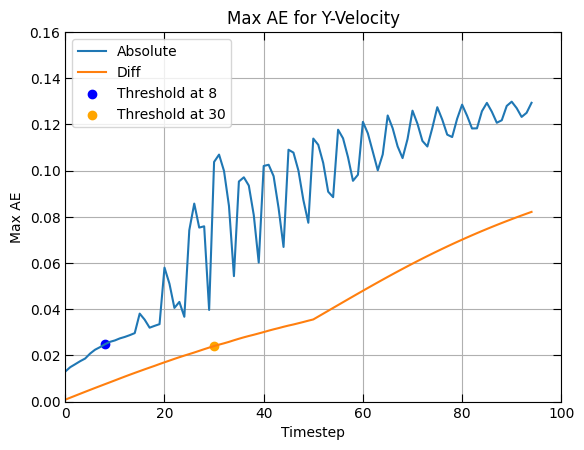

In [8]:
pin = 2
pred_data_path = f"regressive_{data_types[pin]}_predictions.npy"
absolute_pred_data_path = os.path.join(absolute_data_root, pred_data_path)
diff_pred_data_path = os.path.join(diff_data_root, pred_data_path)
true_data_path = f"regressive_{data_types[pin]}_true.npy"
true_data_path = os.path.join(absolute_data_root, true_data_path)
absolute_pred_y = np.load(absolute_pred_data_path)
diff_pred_y = np.load(diff_pred_data_path)
true_y = np.load(true_data_path)
plot_max_ae(absolute_pred_y, diff_pred_y, true_y, data_types[pin])

In [9]:
true_dict = {
    "ux": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_ux_arr_true.npy"),
    "uy": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_uy_arr_true.npy"),
    "t": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_t_arr_true.npy"),
}
abs_pred_dict = {
    "ux": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_ux_arr_predictions.npy"),
    "uy": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_uy_arr_predictions.npy"),
    "t": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_t_arr_predictions.npy"),
}

diff_pred_dict = {
    "ux": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/regressive_ux_arr_predictions.npy"),
    "uy": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/regressive_uy_arr_predictions.npy"),
    "t": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/regressive_t_arr_predictions.npy"),
}

In [10]:
print(true_dict["ux"].shape)

(95, 1, 200, 200)


In [11]:
import residual
def calculate_residual_mass(true_dict, abs_pred_dict, diff_pred_dict):
    true_ux_arr = true_dict["ux"]
    true_uy_arr = true_dict["uy"]
    true_t_arr = true_dict["t"]
    
    abs_pred_ux_matrix = abs_pred_dict["ux"]
    abs_pred_uy_matrix = abs_pred_dict["uy"]
    abs_pred_t_matrix = abs_pred_dict["t"]

    diff_pred_ux_matrix = diff_pred_dict["ux"]
    diff_pred_uy_matrix = diff_pred_dict["uy"]
    diff_pred_t_matrix = diff_pred_dict["t"]

    true_rs_arr = []
    abs_pred_rs_arr = []
    diff_pred_rs_arr = []
    for i in range(1,abs_pred_ux_matrix.shape[0]):
        abs_Rs_mass_pred = residual.residual_mass(abs_pred_ux_matrix[i][0], abs_pred_uy_matrix[i][0])
        diff_Rs_mass_pred = residual.residual_mass(diff_pred_ux_matrix[i][0], diff_pred_uy_matrix[i][0])
        Rs_mass_true = residual.residual_mass(true_ux_arr[i][0], true_uy_arr[i][0])
        true_rs_arr.append(Rs_mass_true)
        abs_pred_rs_arr.append(abs_Rs_mass_pred)
        diff_pred_rs_arr.append(diff_Rs_mass_pred)
    return true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr

def calculate_residual_momentum(true_dict, abs_pred_dict, diff_pred_dict):
    true_ux_arr = true_dict["ux"]
    true_uy_arr = true_dict["uy"]
    true_t_arr = true_dict["t"]
    
    abs_pred_ux_matrix = abs_pred_dict["ux"]
    abs_pred_uy_matrix = abs_pred_dict["uy"]
    abs_pred_t_matrix = abs_pred_dict["t"]

    diff_pred_ux_matrix = diff_pred_dict["ux"]
    diff_pred_uy_matrix = diff_pred_dict["uy"]
    diff_pred_t_matrix = diff_pred_dict["t"]

    true_rs_arr = []
    abs_pred_rs_arr = []
    diff_pred_rs_arr = []
    for i in range(1,abs_pred_ux_matrix.shape[0]):
        abs_Rs_momentum_pred = residual.residual_momentum(abs_pred_ux_matrix[i][0], abs_pred_ux_matrix[i-1][0], abs_pred_uy_matrix[i][0], abs_pred_t_matrix[i][0])
        diff_Rs_momentum_pred = residual.residual_momentum(diff_pred_ux_matrix[i][0], diff_pred_ux_matrix[i-1][0], diff_pred_uy_matrix[i][0], diff_pred_t_matrix[i][0])
        Rs_momentum_true = residual.residual_momentum(true_ux_arr[i][0], true_ux_arr[i-1][0], true_uy_arr[i][0], true_t_arr[i][0])
        true_rs_arr.append(Rs_momentum_true)
        abs_pred_rs_arr.append(abs_Rs_momentum_pred)
        diff_pred_rs_arr.append(diff_Rs_momentum_pred)
    return true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr
def calculate_residual_heat(true_dict, abs_pred_dict, diff_pred_dict):
    true_ux_arr = true_dict["ux"]
    true_uy_arr = true_dict["uy"]
    true_t_arr = true_dict["t"]
    
    abs_pred_ux_matrix = abs_pred_dict["ux"]
    abs_pred_uy_matrix = abs_pred_dict["uy"]
    abs_pred_t_matrix = abs_pred_dict["t"]

    diff_pred_ux_matrix = diff_pred_dict["ux"]
    diff_pred_uy_matrix = diff_pred_dict["uy"]
    diff_pred_t_matrix = diff_pred_dict["t"]

    true_rs_arr = []
    abs_pred_rs_arr = []
    diff_pred_rs_arr = []
    for i in range(1,abs_pred_ux_matrix.shape[0]):
        abs_Rs_heat_pred = residual.residual_heat(abs_pred_ux_matrix[i][0], abs_pred_uy_matrix[i][0], abs_pred_t_matrix[i][0], abs_pred_t_matrix[i-1][0])
        diff_Rs_heat_pred = residual.residual_heat(diff_pred_ux_matrix[i][0], diff_pred_uy_matrix[i][0], diff_pred_t_matrix[i][0], diff_pred_t_matrix[i-1][0])
        Rs_heat_true = residual.residual_heat(true_ux_arr[i][0], true_uy_arr[i][0], true_t_arr[i][0], true_t_arr[i-1][0])
        true_rs_arr.append(Rs_heat_true)
        abs_pred_rs_arr.append(abs_Rs_heat_pred)
        diff_pred_rs_arr.append(diff_Rs_heat_pred)
    return true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr


Last Value True: 0.0002182255268096924
Last Value Absolute: 0.06397776489257813
Last Value Diff: 0.039121098125848866
Maximum value: 0.06397776489257813


/tmp/ipykernel_1295381/262243808.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, max(max(abs_pred_rs_arr), max(diff_pred_rs_arr))*1.1)
/tmp/ipykernel_1295381/262243808.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 0.1)


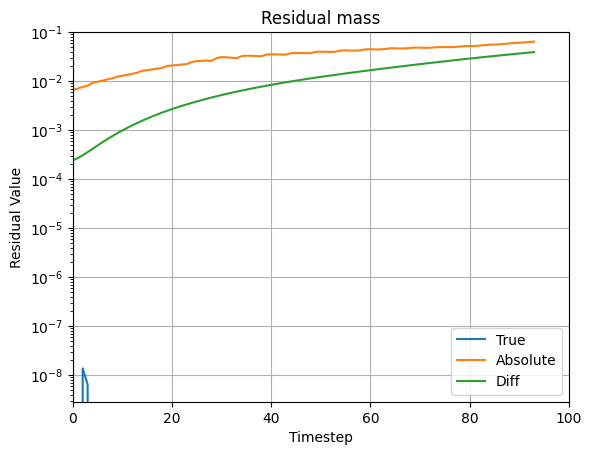

In [12]:
def plot_residual(true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr, residual_type):

    #normalize the residual values according to true_rs_arr[0] as 0 
    true_rs_arr = np.array(true_rs_arr)
    abs_pred_rs_arr = np.array(abs_pred_rs_arr)
    diff_pred_rs_arr = np.array(diff_pred_rs_arr)
    true_rs_arr = true_rs_arr - true_rs_arr[0]
    abs_pred_rs_arr = abs_pred_rs_arr - true_rs_arr[0]
    diff_pred_rs_arr = diff_pred_rs_arr - true_rs_arr[0]
    plt.plot(true_rs_arr, label="True")
    plt.plot(abs_pred_rs_arr, label="Absolute")
    plt.plot(diff_pred_rs_arr, label="Diff")
    plt.grid(True)
    plt.xlabel("Timestep")
    plt.ylabel(f"Residual Value")
    plt.title(f"Residual {residual_type}")
    plt.xlim(0, 100)
    plt.yscale('log')
    plt.ylim(0, max(max(abs_pred_rs_arr), max(diff_pred_rs_arr))*1.1)
    print(f"Maximum value: {max(max(abs_pred_rs_arr), max(diff_pred_rs_arr))}")
    plt.ylim(0, 0.1)
    plt.legend()
    plt.show()

def calculate_residual(true_dict, abs_pred_dit, diff_pred_dict, residual_type):
    residual_type_function_dict  = {
        "mass": calculate_residual_mass,
        "momentum": calculate_residual_momentum,
        "heat": calculate_residual_heat,
    }
    true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr = residual_type_function_dict[residual_type](true_dict, abs_pred_dit, diff_pred_dict)
    print(f"Last Value True: {true_rs_arr[-1]}")
    print(f"Last Value Absolute: {abs_pred_rs_arr[-1]}")
    print(f"Last Value Diff: {diff_pred_rs_arr[-1]}")
    plot_residual(true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr, residual_type)

calculate_residual(true_dict, abs_pred_dict, diff_pred_dict, "mass")

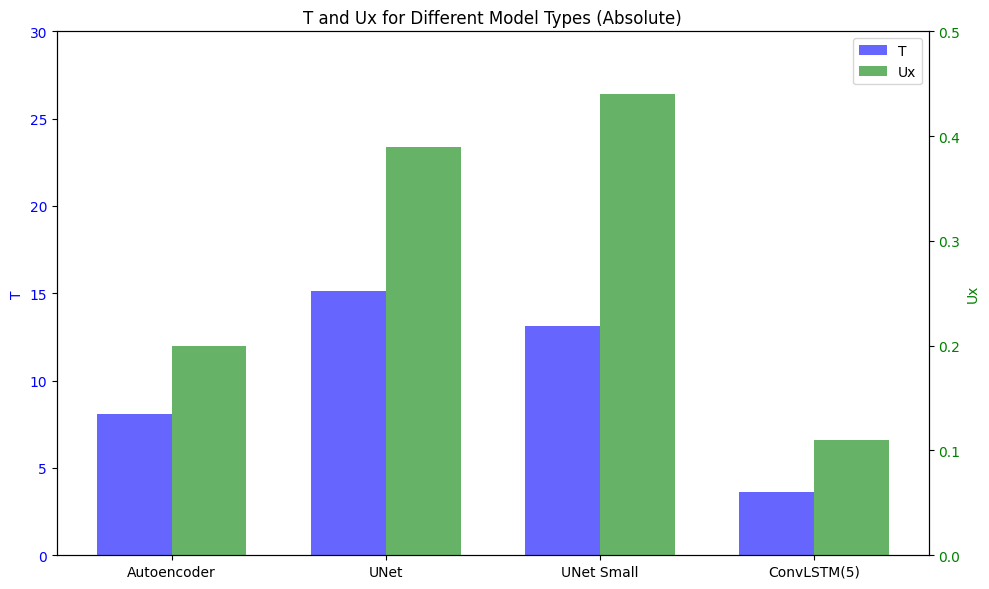

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "Model Type": ["Autoencoder", "Autoencoder", "UNet", "UNet", "UNet Small", "UNet Small", "ConvLSTM(5)", "ConvLSTM(5)"],
    "Generation Type": ["Sequential", "Regressive", "Sequential", "Regressive", "Sequential", "Regressive", "Sequential", "Regressive"],
    "T": [5.53, 8.09, 2.36, 15.16, 1.85, 13.1, 0.44, 3.61],
    "Ux": [0.05, 0.2, 0.032, 0.39, 0.027, 0.44, 0.01, 0.11],
    "Uy": [0.09, 0.1, 0.027, 0.55, 0.53, 0.5, 0.01, 0.129]
}

df = pd.DataFrame(data)

# Filter data to include only the Regressive generation type
filtered_df = df[df["Generation Type"] == "Regressive"].reset_index(drop=True)

# Plotting combined bar graph for T and Ux
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(filtered_df))

# Plot T
bar1 = ax1.bar(index, filtered_df["T"], bar_width, label='T', color='blue', alpha=0.6)
ax1.set_ylabel("T", color='blue')
ax1.set_ylim(0, 30)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("T and Ux for Different Model Types (Absolute)")

# Create a second y-axis to plot Ux
ax2 = ax1.twinx()
bar2 = ax2.bar([i + bar_width for i in index], filtered_df["Ux"], bar_width, label='Ux', color='green', alpha=0.6)
ax2.set_ylabel("Ux", color='green')
ax2.set_ylim(0, 0.5)
ax2.tick_params(axis='y', labelcolor='green')

# Add labels and legend
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(filtered_df["Model Type"])
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

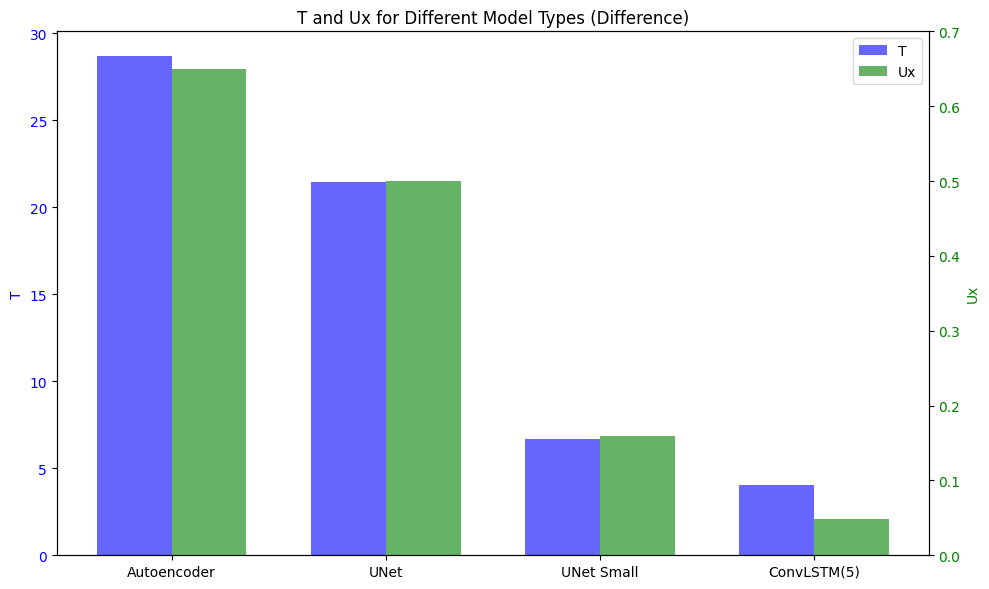

In [71]:
# Updated data
new_data = {
    "Model Type": ["Autoencoder", "Autoencoder", "UNet", "UNet", "UNet Small", "UNet Small", "ConvLSTM(5)", "ConvLSTM(5)"],
    "Generation Type": ["Sequential", "Regressive", "Sequential", "Regressive", "Sequential", "Regressive", "Sequential", "Regressive"],
    "T": [0.28, 28.67, 0.08, 21.44, 0.079, 6.67, 0.03, 4.01],
    "Ux": [0.006, 0.65, 0.002, 0.5, 0.001, 0.16, 0.0007, 0.048],
    "Uy": [0.024, 2.46, 0.002, 0.41, 0.002, 0.26, 0.0008, 0.082]
}

new_df = pd.DataFrame(new_data)

# Filter data to include only the Regressive generation type
filtered_new_df = new_df[new_df["Generation Type"] == "Regressive"].reset_index(drop=True)

# Plotting combined bar graph for T and Ux
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(filtered_new_df))

# Plot T
bar1 = ax1.bar(index, filtered_new_df["T"], bar_width, label='T', color='blue', alpha=0.6)
ax1.set_ylabel("T", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("T and Ux for Different Model Types (Difference)")

# Create a second y-axis to plot Ux
ax2 = ax1.twinx()
bar2 = ax2.bar([i + bar_width for i in index], filtered_new_df["Ux"], bar_width, label='Ux', color='green', alpha=0.6)
ax2.set_ylabel("Ux", color='green')
ax2.set_ylim(0, 0.7)
ax2.tick_params(axis='y', labelcolor='green')

# Add labels and legend
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(filtered_new_df["Model Type"])
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


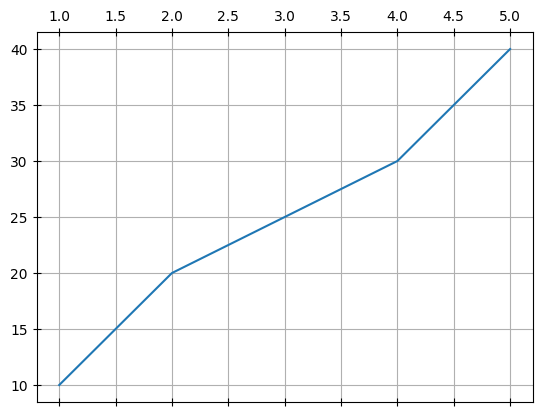

In [14]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

fig, ax = plt.subplots()

ax.plot(x, y)

# Set ticks to reach the top of the graph
ax.tick_params(axis='both', which='both', direction='inout', length=6)

# Set ticks for the top x-axis
ax.xaxis.tick_top()
ax.tick_params(axis='x', which='both', top=True, bottom=True)

# Show the grid
plt.grid(True)

# Display the plot
plt.show()

# Residual Calculation

In residual calculation, need to normalize $t_0$ of ground truth as 0, and all others respectively.